In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.animation import FuncAnimation  

In [2]:
y = np.linspace(1.5, 2.5, 20)
x = np.linspace(-1, 1, 20)

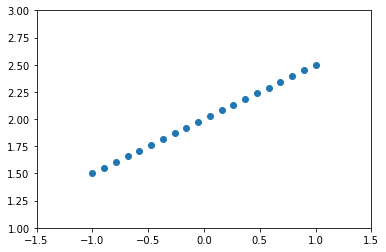

In [3]:
plt.xlim(-1.5, 1.5)
plt.ylim(1, 3)
plt.scatter(x, y)

In [4]:
a = np.arange(-80, 80, 2)
b = np.arange(-60, 60, 2)

In [5]:
# partial_loss = np.array([curr_y - ((av * curr_x) + bv) for curr_x, curr_y in zip(x, y)])
def calculate_loss(w1, w2):
    return sum([pow((curr_y - (curr_x*w1 + w2)), 2) for curr_x, curr_y in zip(x,y)])

In [6]:
def calculate_gradient(w1, w2, l_r):
    d_w2 = sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * w2 for curr_x, curr_y in zip(x,y)])
    d_w1 = sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * curr_x for curr_x, curr_y in zip(x,y)])
    w1_ = w1 - l_r * d_w1
    w2_ = w2 - l_r * d_w2
    return w1_, w2_

In [7]:
def calculate_gradient_momentum(w1, w2, l_r, mom, pre_d_w1, pre_d_w2):
    d_w2 = pre_d_w2 * mom - l_r * sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * w2 for curr_x, curr_y in zip(x,y)])
    d_w1 = pre_d_w1 * mom - l_r * sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * curr_x for curr_x, curr_y in zip(x,y)])
    w1_ = w1 + d_w1
    w2_ = w2 + d_w2
    return w1_, w2_, d_w1, d_w2

In [32]:
xx = np.zeros((len(a),len(b)),dtype='d')
yy = np.zeros((len(a),len(b)),dtype='d')
zz = np.zeros((len(a),len(b)),dtype='d')
# populate x,y,z arrays
for i, curr_a in enumerate(a):
    for j, curr_b in enumerate(b):
        xx[i,j] = curr_a
        yy[i,j] = curr_b
        zz[i,j] = sum([pow((curr_x*curr_a + curr_b - curr_y), 2) for curr_x, curr_y in zip(x,y)])
xx_ = xx.flatten()
yy_ = yy.flatten()
zz_ = zz.flatten()

In [124]:
curr_w1 = 80
curr_w2 = 60
w1_s = [curr_w1]
w2_s = [curr_w2]
loss_s = [calculate_loss(curr_w1, curr_w2)]
while calculate_loss(curr_w1, curr_w2) > 0.001 :
    curr_w1, curr_w2 = calculate_gradient(curr_w1, curr_w2, 0.00001)
    curr_loss = calculate_loss(curr_w1, curr_w2)
    w1_s.append(curr_w1)
    w2_s.append(curr_w2)
    loss_s.append(curr_loss)

In [125]:
curr_w1 = 80
curr_w2 = 60
curr_d_w1, curr_d_w2 = 0, 0
w1_s_mom = [curr_w1]
w2_s_mom = [curr_w2]
loss_s_mom = [calculate_loss(curr_w1, curr_w2)]
while calculate_loss(curr_w1, curr_w2) > 0.001 :
    curr_w1, curr_w2, curr_d_w1, curr_d_w2 = calculate_gradient_momentum(curr_w1, curr_w2, 
                                                                         0.00001, 0.8, 
                                                                         curr_d_w1, curr_d_w2)
    curr_loss = calculate_loss(curr_w1, curr_w2)
    w1_s_mom.append(curr_w1)
    w2_s_mom.append(curr_w2)
    loss_s_mom.append(curr_loss)

In [126]:
def norm(x1, y1, z1):
    return np.sqrt(pow(x1, 2) + pow(y1, 2) + pow(z1, 2))

norm_ = [norm(w1_s[i], w2_s[i], loss_s[i]) for i in range(len(loss_s))]

In [127]:
prev_val = norm_[29]
first_diff = norm_[28] - prev_val
print(first_diff)
indexes = []
for i, v in enumerate(norm_[30:]):
    if (prev_val - v) >= first_diff:
        indexes.append(i)
        prev_val = v
print(indexes)
    

690.3376704811963
[1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 23, 26, 29, 33, 37, 41, 46, 51, 57, 64, 72, 81, 91, 103, 117, 134, 154, 178, 206, 239, 277, 319, 365, 414, 466, 520, 576, 634, 694, 755, 818, 882, 948, 1015, 1084, 1154, 1226, 1300, 1375, 1452, 1531, 1612, 1695, 1780, 1867, 1957, 2049, 2144, 2241, 2341, 2444, 2550, 2660, 2773, 2890, 3012, 3138, 3269, 3405, 3547, 3695, 3850, 4012, 4182, 4361, 4550, 4750, 4963, 5190, 5433, 5695, 5979, 6289, 6630, 7009, 7436, 7924, 8494, 9180, 10040, 11195, 12959, 16845]


In [128]:
print(len(loss_s), len(loss_s_mom))
difference = len(loss_s) - len(loss_s_mom)
print(difference)
w1_s_mom = w1_s_mom + [w1_s_mom[-1] for i in range(difference)]
w2_s_mom = w2_s_mom + [w2_s_mom[-1] for i in range(difference)]
loss_s_mom = loss_s_mom + [loss_s_mom[-1] for i in range(difference)]
print(len(loss_s), len(loss_s_mom))

def reduce_size(list_, indexes=indexes):
    list_n = list_[:30]
    list_n = list_n + [v for i, v in enumerate(list_[30:]) if i in indexes] + list_[-1]
    return list_n

w1_s = reduce_size(w1_s)
w2_s = reduce_size(w2_s)
loss_s = reduce_size(loss_s)

w1_s_mom = reduce_size(w1_s_mom)
w2_s_mom = reduce_size(w2_s_mom)
loss_s_mom = reduce_size(loss_s_mom)
print(len(loss_s_mom))

59903 11947
47956
59903 59903
123


In [157]:
def update_plot_3d(i, lines):
    l1_, l2_, scat1_, scat2_, txt1_, txt2_ = lines
    curr_w1_s = w1_s[:i]
    curr_w2_s = w2_s[:i]
    curr_loss_s = loss_s[:i]
    
    curr_w1_s_mom = w1_s_mom[:i]
    curr_w2_s_mom = w2_s_mom[:i]
    curr_loss_s_mom = loss_s_mom[:i]
    
    txt1_.set_text("LOSS = {}".format(round(loss_s[i], 3)))
    txt2_.set_text("LOSS = {}".format(round(loss_s_mom[i], 3)))
    
    l1_.set_data_3d(curr_w1_s, curr_w2_s, curr_loss_s)
    l2_.set_data_3d(curr_w1_s_mom, curr_w2_s_mom, curr_loss_s_mom)
    scat1_.set_data_3d([w1_s[i]], [w2_s[i]], [loss_s[i]])
    scat2_.set_data_3d([w1_s_mom[i]], [w2_s_mom[i]], [loss_s_mom[i]])
    return (l1_, l2_),

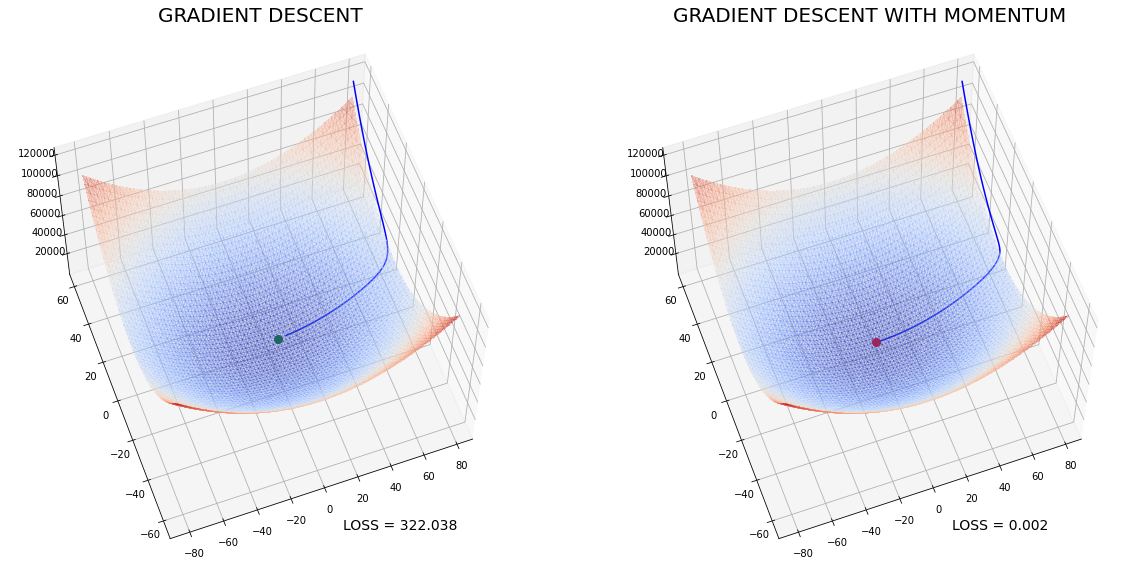

In [158]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_trisurf(xx_, yy_, zz_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.3)
l1 = ax.plot([], [], [], 'b', alpha=1)[0]
scat1 = ax.plot([], [], [], "o", color='green', markersize=8)[0]
ax.set_title("GRADIENT DESCENT\n", fontsize=20)
time_text1 = ax.text(0, -90, 10, '', fontsize=14)
ax.view_init(60, -110)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_trisurf(xx_, yy_, zz_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.3)
l2 = ax.plot([], [], [], 'b', alpha=1)[0]
scat2 = ax.plot([], [], [], "o", color='red', markersize=8)[0]
ax.set_title("GRADIENT DESCENT WITH MOMENTUM\n", fontsize=20)
time_text2 = ax.text(0, -90, 10, '', fontsize=14)
ax.view_init(60, -110)
grad_vs_gradmom = FuncAnimation(fig, update_plot_3d, len(loss_s), fargs=((l1, l2, scat1, scat2, 
                                                                          time_text1, time_text2),))
grad_vs_gradmom.save('momentum.mp4', writer='ffmpeg', fps=30)